In [6]:
pip install numpy pandas fuzzy-c-means matplotlib


Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
from fcmeans import FCM
from matplotlib import pyplot as plt

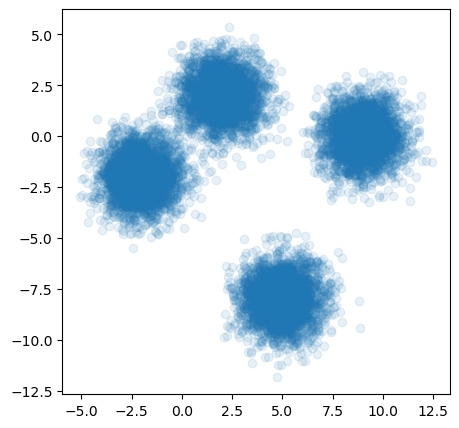

In [26]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2)),
    np.random.normal((9, 0), size=(n_samples, 2)),
    np.random.normal((5, -8), size=(n_samples, 2))
))

plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], alpha=.1)
plt.show()

# This code creates a synthetic dataset with points from four different normal distributions and visualizes them in a scatter plot. The data points from each distribution are displayed with some transparency, allowing  to see the overlapping regions.

# Let see how the fuzzy c-means works------

In [27]:
fcm=FCM(n_clusters=2)  #TAKING THE NUMBER OF CLUSTERS AS 2
fcm.fit(X)  

In [28]:
#OUTPUT

fcm_centers=fcm.centers
fcm_labels=fcm.predict(X)

In [29]:
fcm_centers

array([[ 6.79589528, -4.04490606],
       [ 0.29050148, -0.22645098]])

# We got 2 cluster centers.

In [30]:
np.unique(fcm_labels)

array([0, 1], dtype=int64)

# Here we are getting 2 labels means 2 clusters is assigned .

# Now let plot the results---

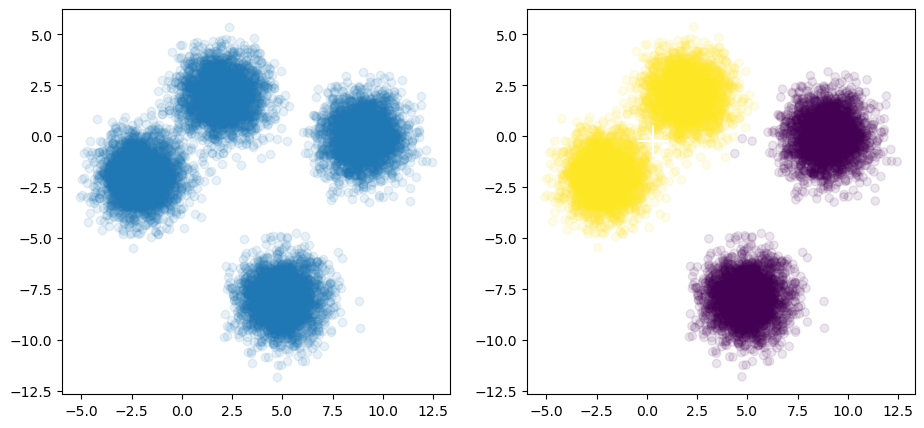

In [31]:
#PLOT RESULTS

f , axes = plt.subplots(1,2,figsize=(11,5))
axes[0].scatter(X[ :,0],X[ :,1], alpha=0.1)
axes[1].scatter(X[ :,0],X[ :,1],c=fcm_labels,alpha=0.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()

# Upon visual inspection of the scatter plot, we observe an apparent division of the data points into two main clusters. One cluster is represented by yellowish points, while the other is denoted by violet points. This visual separation suggests a grouping or clustering effect within the synthetic dataset .

# Now , let see that what should be the ideal cluster .

In [35]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(X)
    models.append(fcm)
        

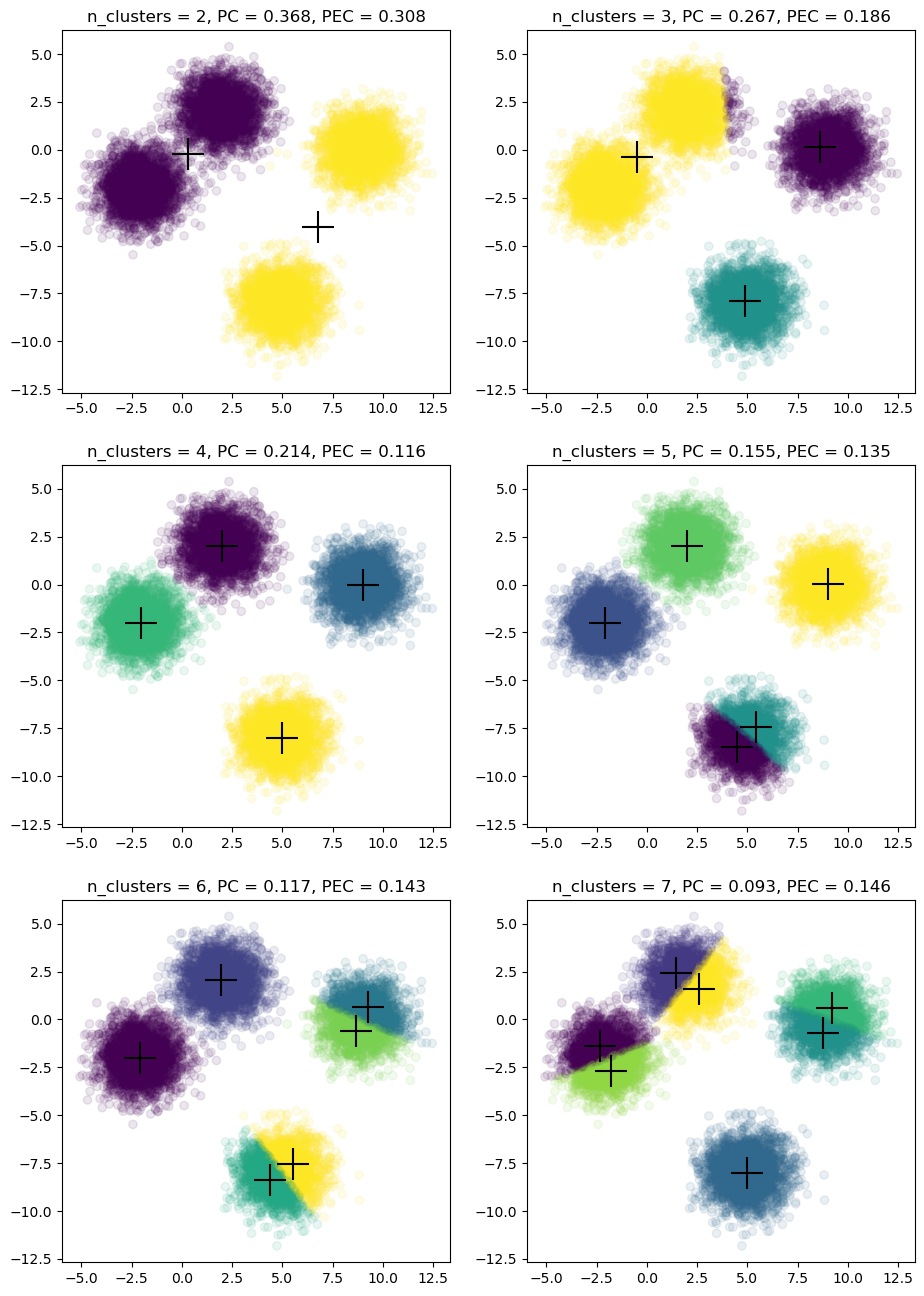

In [36]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(11,16))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()

# Partition Coefficient (PC):

* The partition coefficient measures the degree of fuzziness in the clustering. It indicates how well data points are distributed across different clusters, reflecting the "fuzziness" in the assignment of points to clusters.

* The partition coefficient ranges from 0 to 1, where 0 indicates maximum fuzziness (all points are equally distributed across clusters), and 1 indicates minimum fuzziness (each point is assigned entirely to one cluster).

* A higher partition coefficient suggests a more clear-cut assignment of points to clusters.

# Partition Entropy Coefficient (PEC):

* The partition entropy coefficient measures the uncertainty or disorder in the assignment of data points to clusters. It quantifies how well-defined the clusters are in terms of their membership.

* The partition entropy coefficient ranges from 0 to log(number of clusters), where 0 indicates minimum entropy (perfectly defined clusters), and log(number of clusters) indicates maximum entropy (maximum disorder, points are equally distributed across clusters).

* A lower partition entropy coefficient suggests more well-defined clusters.

# When we compare different cluster numbers using Partition Coefficient (PC) and Partition Entropy Coefficient (PEC), we find that 2 clusters are the best. We like a high PC because it means our clusters are clear, and we prefer a low PEC because it shows less confusion and more distinct clusters.



# So, for a large set of data, we can use these values to figure out the exact number of clusters. We look for the number that gives the highest PC and the lowest PEC. This helps us choose the right number of clusters, balancing clear separation without having too many or too few clusters. It's like finding the sweet spot for the best clustering solution. Visualizing the results can also make it easier to understand what's happening with the data.